In [2]:
import pandas as pd
import numpy as np
import json

## annotations

In [3]:
anns = pd.read_json('data/anns.json', orient='columns')
anns

,num_anns,anns
1,1,[A person is walking forwards.]
2,1,[A person walks 4 steps forward.]
3,1,[A human walking]
4,2,"[A person walks forward at medium speed., huma..."
5,1,[A human walks four slow steps forward]
...,...,...
3962,1,[A person runs straight forward.]
3963,0,[]
3964,1,[A person is sprinting up and down a small hil...
3965,1,"[A person runs forward, briefly touches the gr..."


In [4]:
with open('data/anns.json', 'rb') as f:
    j = json.load(f)

In [5]:
anns['keyid'] = j['num_anns'].keys()
anns = anns.set_index('keyid')
anns

,num_anns,anns
keyid,,
00001,1,[A person is walking forwards.]
00002,1,[A person walks 4 steps forward.]
00003,1,[A human walking]
00004,2,"[A person walks forward at medium speed., huma..."
00005,1,[A human walks four slow steps forward]
...,...,...
03962,1,[A person runs straight forward.]
03963,0,[]
03964,1,[A person is sprinting up and down a small hil...


In [20]:
count, ann = anns[anns.index == '00004'].values[0]

In [21]:
count, ann

(2, ['A person walks forward at medium speed.', 'human slowly goes forward'])

<Axes: xlabel='keyid'>

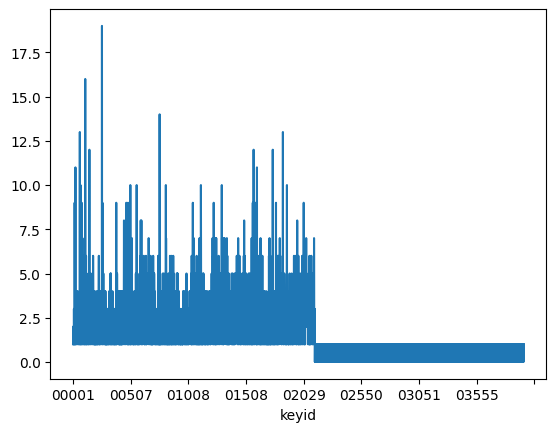

In [51]:
anns['num_anns'].plot()

In [17]:
anns[anns['num_anns'] == 0]

,num_anns,anns
2126,0,[]
2130,0,[]
2131,0,[]
2136,0,[]
2137,0,[]
...,...,...
3948,0,[]
3949,0,[]
3950,0,[]
3958,0,[]


## poses

In [22]:
poses = pd.read_pickle('data/fke_inplace_data.pkl')
poses

{'00001': array([[[   0.        ,    0.        ,    0.        ],
         [  -5.72772407,   79.76091824,   -2.32144328],
         [   4.96242104,  199.27589917,   -3.69626366],
         ...,
         [  42.64340814, -487.51935769,   48.07033306],
         [  19.41563865, -506.52219867,   44.08878167],
         [ -32.97825188, -523.87516383,   55.1350641 ]],
 
        [[   0.        ,    0.        ,    0.        ],
         [  -5.85766083,   79.75242093,   -2.28892241],
         [   6.07633657,  199.14844113,   -3.76203657],
         ...,
         [  42.82160233, -487.51821943,   47.5987365 ],
         [  19.63484523, -506.57818134,   43.65131463],
         [ -32.68082697, -524.09149435,   54.81463985]],
 
        [[   0.        ,    0.        ,    0.        ],
         [  -5.96127878,   79.7456222 ,   -2.25807322],
         [   6.04495889,  199.13542155,   -3.64590222],
         ...,
         [  42.55746842, -487.56440672,   47.22600137],
         [  19.34117162, -506.60301286,   43.34

In [23]:
test_df = pd.DataFrame({'poses': [x for x in poses['00001']]} )
test_df

,poses
0,"[[0.0, 0.0, 0.0], [-5.72772406761851, 79.76091..."
1,"[[0.0, 0.0, 0.0], [-5.857660832739384, 79.7524..."
2,"[[0.0, 0.0, 0.0], [-5.961278779344866, 79.7456..."
3,"[[0.0, 0.0, 0.0], [-6.024134513322224, 79.7415..."
4,"[[0.0, 0.0, 0.0], [-6.2054965663153325, 79.728..."
...,...
373,"[[0.0, 0.0, 0.0], [-14.797951446111938, 78.598..."
374,"[[0.0, 0.0, 0.0], [-14.714824121436777, 78.614..."
375,"[[0.0, 0.0, 0.0], [-14.694026026850452, 78.618..."
376,"[[0.0, 0.0, 0.0], [-14.690840597158058, 78.619..."


In [24]:
test_df['keyid'] ='00001'

In [25]:
dfs = []
for key, seq_poses in poses.items():
    key_df = pd.DataFrame({'poses': [pose for pose in seq_poses]} )
    key_df['keyid'] = key

    dfs += [key_df]

df = pd.concat(dfs, ignore_index=True)

In [26]:
df

,poses,keyid
0,"[[0.0, 0.0, 0.0], [-5.72772406761851, 79.76091...",00001
1,"[[0.0, 0.0, 0.0], [-5.857660832739384, 79.7524...",00001
2,"[[0.0, 0.0, 0.0], [-5.961278779344866, 79.7456...",00001
3,"[[0.0, 0.0, 0.0], [-6.024134513322224, 79.7415...",00001
4,"[[0.0, 0.0, 0.0], [-6.2054965663153325, 79.728...",00001
...,...,...
4148197,"[[0.0, 0.0, 0.0], [-16.625586390886383, 75.384...",03966
4148198,"[[0.0, 0.0, 0.0], [-16.316082736789213, 75.800...",03966
4148199,"[[0.0, 0.0, 0.0], [-15.905160086147589, 76.130...",03966
4148200,"[[0.0, 0.0, 0.0], [-15.339257545318105, 76.439...",03966


In [32]:
len(df), df.shape

(4148202, (4148202, 2))